# Proyecto 3 - Machine Learning

## 1. Inicialización e interpretación del Dataset

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Definir rutas a los archivos de datos
BASE_PATH = "/app/data"  # Esta será la ruta dentro del contenedor

train_path = os.path.join(BASE_PATH, "trainingData.csv")
val_path = os.path.join(BASE_PATH, "validationData.csv")

# Verificar que los archivos existen
if not os.path.exists(train_path):
    raise FileNotFoundError(f"No se encuentra el archivo: {train_path}")
if not os.path.exists(val_path):
    raise FileNotFoundError(f"No se encuentra el archivo: {val_path}")

print("Archivos encontrados correctamente.")

# Cargar los datos
train_df = pd.read_csv(train_path)
val_df = pd.read_csv(val_path)

visualizamos las primeras filas del dataset de train

In [ ]:
train_df = pd.read_csv(train_path)
val_df = pd.read_csv(val_path)

print("Train shape:", train_df.shape)
print("Validation shape:", val_df.shape)

train_df.head()

Train shape: (19937, 529)
Validation shape: (1111, 529)


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


visualizamos las columnas del dataset train

In [ ]:
train_df.columns

Index(['WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005', 'WAP006', 'WAP007',
       'WAP008', 'WAP009', 'WAP010',
       ...
       'WAP520', 'LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID',
       'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP'],
      dtype='object', length=529)

**Descripción del dataset:**

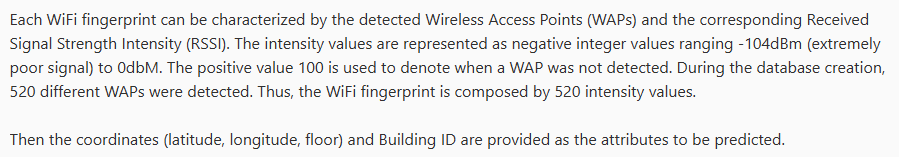

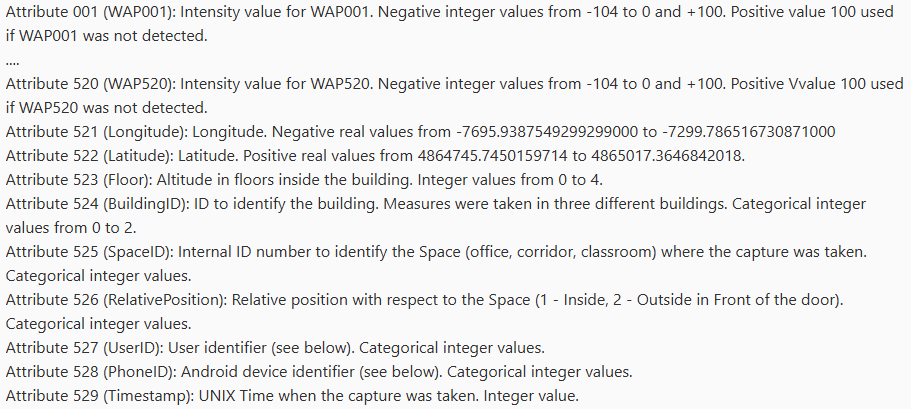

**Interpretación del dataset** <br>
Una vez revisada la descricpción del dataset por los mismos autores sabemos que: <br>
- Cada fila es una medición tomada en un punto específico.

- Existen hasta 520 Access Points distintos detectables en todo el campus


Para un punto se registra la intensidad de señal de 520 access points.
La combinación de estas señales forma una huella digital única del lugar.

donde las señales de intensidad van de -140 (bajo) hasta 0 (alto) , en caso sea 100 significa que la señal no fue detectada



---

<br><br><br><br>

## 2. Análisis Exploratorio de los datos

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 529 entries, WAP001 to TIMESTAMP
dtypes: float64(2), int64(527)
memory usage: 80.5 MB


In [ ]:
train_df.describe().T.head(20)

,count,mean,std,min,25%,50%,75%,max
WAP001,19937.0,99.823644,5.866842,-97.0,100.0,100.0,100.0,100.0
WAP002,19937.0,99.820936,5.798156,-90.0,100.0,100.0,100.0,100.0
WAP003,19937.0,100.000000,0.000000,100.0,100.0,100.0,100.0,100.0
WAP004,19937.0,100.000000,0.000000,100.0,100.0,100.0,100.0,100.0
WAP005,19937.0,99.613733,8.615657,-97.0,100.0,100.0,100.0,100.0
WAP006,19937.0,97.130461,22.931890,-98.0,100.0,100.0,100.0,100.0
WAP007,19937.0,94.733661,30.541335,-99.0,100.0,100.0,100.0,100.0
WAP008,19937.0,93.820234,33.010404,-98.0,100.0,100.0,100.0,100.0
WAP009,19937.0,94.693936,30.305084,-98.0,100.0,100.0,100.0,100.0
WAP010,19937.0,99.163766,12.634045,-99.0,100.0,100.0,100.0,100.0


vemos que algunas señales como WAP003 Y WAP004 tiene un promedio de 100, que significa que no tienen influencia en ninguno de los registros, como agregan ruido el  en el preprocesamiento las eliminaremos.

**Declaramos un nuevo dataset X que tendrá solo las señales (WAP) de los features**

In [ ]:
WAP_cols = train_df.columns[:520]
X = train_df[WAP_cols]

como vimos antes y ahora, existen 520 WAPs. Hay alta dimensionalidad

**¿En promedio Cuántos WAPs son detectados por cada medición?**

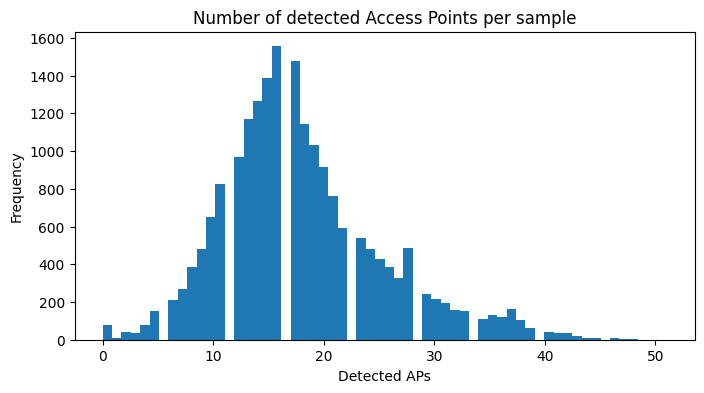

Average detected WAPs: 17.994833726237648


In [ ]:
detected_aps = (X != 100).sum(axis=1)

plt.figure(figsize=(8,4))
plt.hist(detected_aps, bins=60)
plt.title("Number of detected Access Points per sample")
plt.xlabel("Detected APs")
plt.ylabel("Frequency")
plt.show()

print("Average detected WAPs:", detected_aps.mean())

~18, cada punto aproximadamente detecta una pequeña fracción entonces existe alta dispersión, ya que 18/520 = 3.4% de densidad


**Gráfica de la intensidad de WAP por frecuencia**

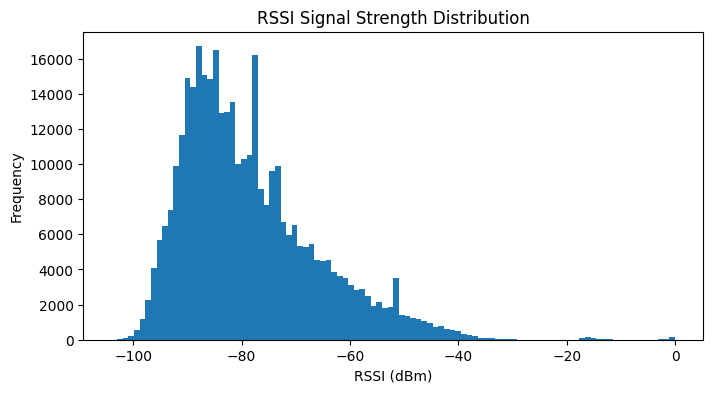

In [ ]:
rssi_values = X.replace(100, np.nan).stack()

plt.figure(figsize=(8,4))
plt.hist(rssi_values, bins=100)
plt.title("RSSI Signal Strength Distribution")
plt.xlabel("RSSI (dBm)")
plt.ylabel("Frequency")
plt.show()

Vemos que existe ruido entre las señales. Además, las señales bajas dominan

**¿Cuántos samples hay en cada edificio?**

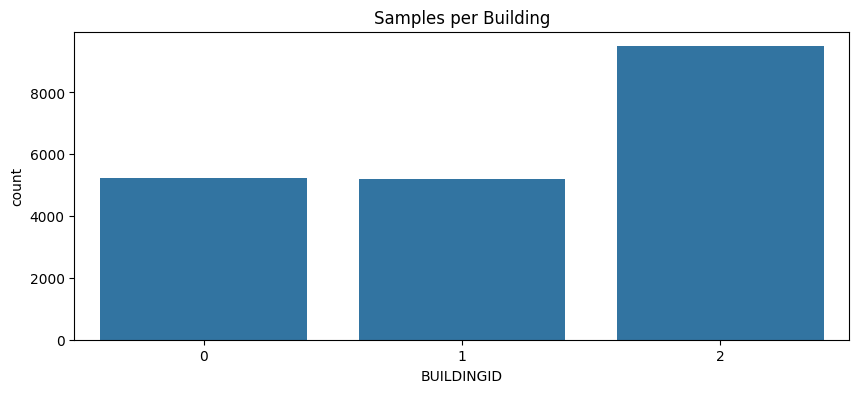

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x="BUILDINGID", data=train_df)
plt.title("Samples per Building")
plt.show()

**Mapa físico real:** donde fueron tomandos los datos calculados por la longitud y latitud de la medición

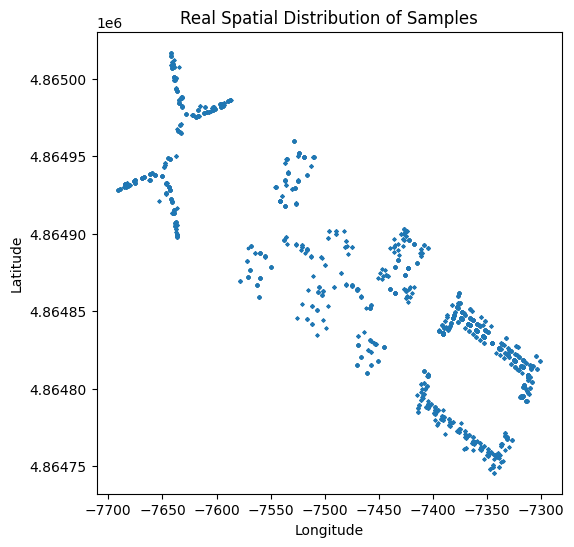

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(train_df["LONGITUDE"], train_df["LATITUDE"], s=2)
plt.title("Real Spatial Distribution of Samples")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

**Usamos reducción de la dimensionalidad con pca para visualizar clusters**

PCA

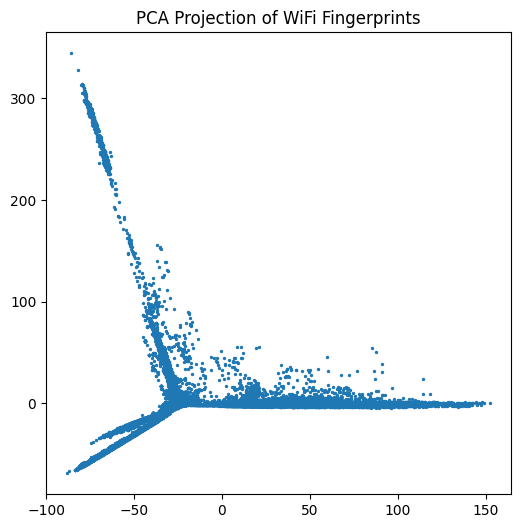

In [ ]:
X_clean = X.replace(100, -110) # reemplazamos sin datos (100) por señal extremadamente baja (-110)
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_clean)
plt.figure(figsize=(6,6))
plt.scatter(X_pca_2d[:,0], X_pca_2d[:,1], s=2)
plt.title("PCA Projection of WiFi Fingerprints")
plt.show()

PCA coloreado por edificio

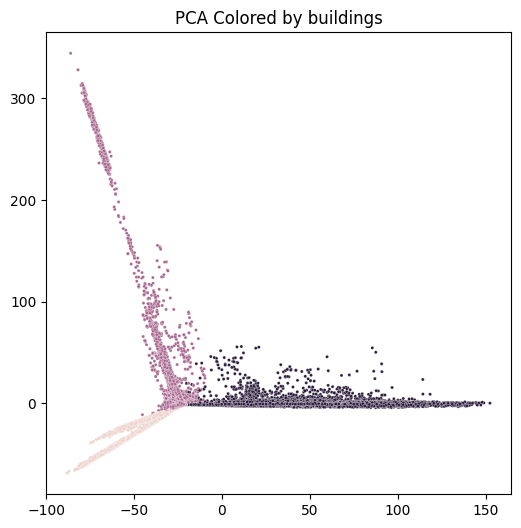

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=X_pca_2d[:,0], y=X_pca_2d[:,1], hue=train_df["BUILDINGID"], s=5, legend=False)
plt.title("PCA Colored by buildings")
plt.show()

PCA coloreado por área

ahora colorearemos por área = BuildingId + Floor

In [ ]:
train_df["AREA"] = (
    train_df["BUILDINGID"].astype(str) + "_" +
    train_df["FLOOR"].astype(str)
) # estamos creando una nueva columna combinación de edifico + piso que será el área

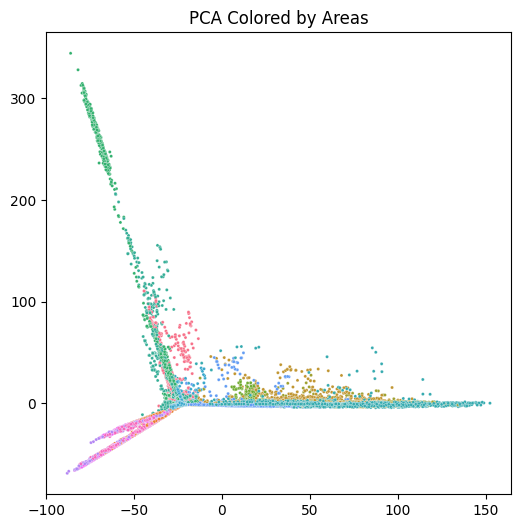

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=X_pca_2d[:,0], y=X_pca_2d[:,1], hue=train_df["AREA"], s=5, legend=False)
plt.title("PCA Colored by Areas")
plt.show()

Con todo el análisis demostramos que:
- Existe Alta dimensionalidad
- Existe Alta Dispersión de los datos
- Señales Ruidosas
- Estructura espacial real (Mapa físico real)
- Separabilidad

## 3. Preprocesamiento

**2.1 Terminar la separamos de features**

Con anterioridad definimos esta variable:
- WAP_cols: columnas que son WAPs

Y agregamos esta columna:
- train_df["AREA"] = BUILDINGID + FLOOR

Separamos los features

In [ ]:
X_train = train_df[WAP_cols].copy()
X_val = val_df[WAP_cols].copy()

val_df["AREA"] = val_df["BUILDINGID"].astype(str) + "_" + val_df["FLOOR"].astype(str)

y_train = train_df["AREA"]
y_val = val_df["AREA"]

**2.2 Reemplazamos 100 por -110:** ya que este último es menor que la señal más baja -104, esto se hizo ya que preservamos las relaciones de las distancias

In [ ]:
X_train = X_train.replace(100, -110)
X_val = X_val.replace(100, -110)

**2.3 Eliminamos los WAPs nunca detectados**

In [ ]:
non_constant_cols = X_train.columns[X_train.nunique() > 1]

X_train = X_train[non_constant_cols]
X_val = X_val[non_constant_cols]

print("WAPs que quedan:", len(non_constant_cols))

WAPs que quedan: 465


**2.4 Eliminamos WAPs muy raros:** Si un router aparece en < 1% de puntos introducirá ruido

In [ ]:
presence_ratio = (X_train > -110).sum(axis=0) / len(X_train)

useful_cols = presence_ratio[presence_ratio > 0.01].index

X_train = X_train[useful_cols]
X_val = X_val[useful_cols]

print("Después de eliminar WAPs raros:", X_train.shape[1])


Después de eliminar WAPs raros: 271


**2.4 Estandarización de datos:** esto será importante ya que el clustering usa la distancia euclidiana y al estar estandarizados los datos nos aseguramos que los features que tengan rangos similares

Gráfica antes de la estandarización donde se muestra que la potencia de la señal (RSSI) es nula (ya que antes convertimos RSSI 100 = -110)

La mayoría de features contienen ausencia de señal, lo que provoca una distribución altamente sesgada y dispersa.

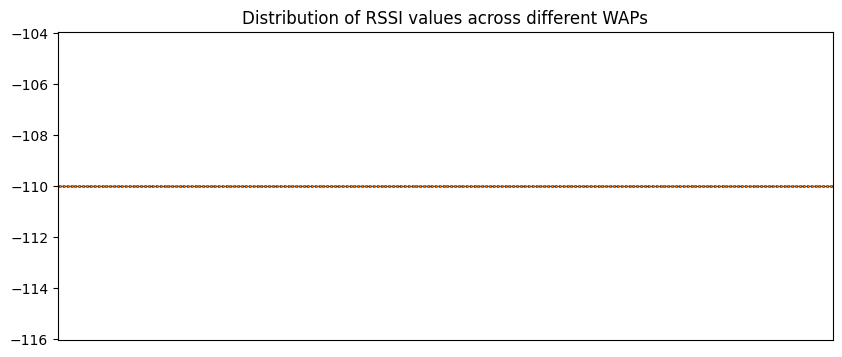

In [ ]:
plt.figure(figsize=(10,4))
plt.boxplot(X_train.sample(200, axis=1), showfliers=False)
plt.xticks([])
plt.title("Distribution of RSSI values across different WAPs")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


Gráfico después de la Estandarización: La estandarización centró todos los features (< 0) y emparejó las varianzas de los features

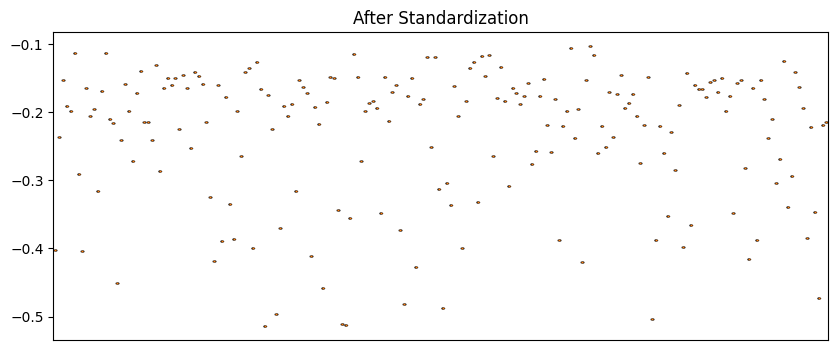

In [ ]:
plt.figure(figsize=(10,4))
plt.boxplot(pd.DataFrame(X_train_scaled).sample(200, axis=1), showfliers=False)
plt.xticks([])
plt.title("After Standardization")
plt.show()

**2.5 PCA para clustering:** Como tenemos 271 dimensiones necesitamos evitar la maldición de la dimensionalidad por eso usamos PCA para reducir dimensiones, vamos a reducir y conservar una varianza del 95%

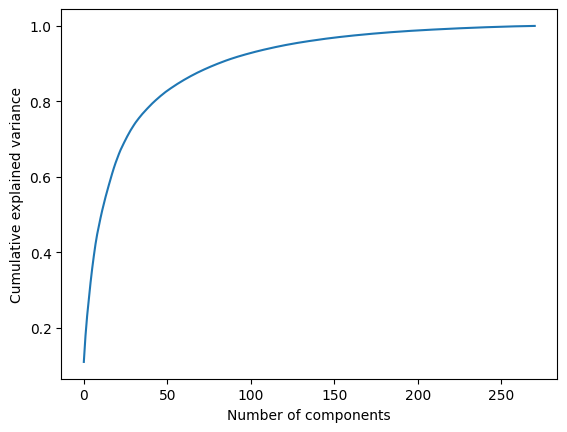

In [ ]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_train_scaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.show()

In [ ]:
pca = PCA(n_components=0.95) # con 95% de la varianza conservada

X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)

print("Original dims:", X_train_scaled.shape[1])
print("Reduced dims:", X_train_pca.shape[1])

Original dims: 271
Reduced dims: 123


En el preprocesamiento se redujo de 520 a 123 dimensiones manteniendo el 95% de la varianza de los datos. La cantidad alta de dimensiones indica que los WIFI Fingerprints contiene información espacial distribuida en varios WAPs



---

<br><br><br><br>

## 4. KMeans

### 4.1 Definir K óptimo

**Definir K:** primero necesitaremos definir un k, y para eso nos apoyaremos de 2 métodos vistos en clase Elbow y Silhouette

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Ks = range(2, 21)

inertia = []
silhouette = []

for k in Ks:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_train_pca)

    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_train_pca, labels))


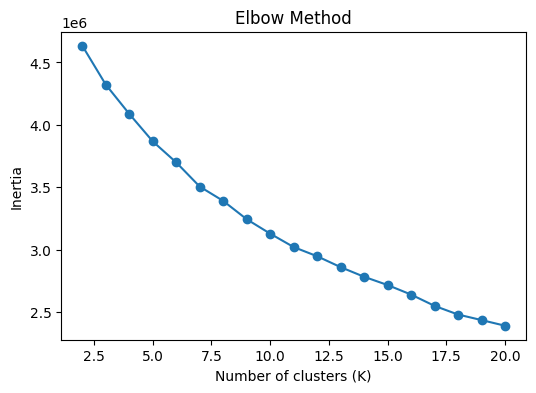

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(Ks, inertia, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


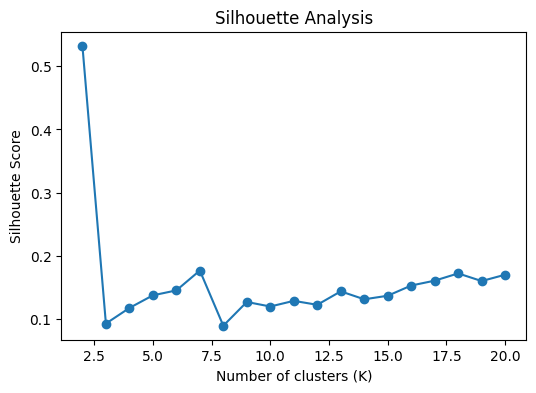

Best K by silhouette: 2


In [ ]:
plt.figure(figsize=(6,4))
plt.plot(Ks, silhouette, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.show()

print("Best K by silhouette:", Ks[np.argmax(silhouette)])

El Elbow Method no reveló un punto de inflexión claro, lo que indica la ausencia de una única escala de clustering natural. La silhouette score favoreció K=2, lo que sugiere la presencia de macrorregiones extensas. Por lo tanto, se analizarán múltiples valores de K para capturar diferentes niveles de granularidad.

K_values = [2, 3, 6, 10, 18, 20]

**Entrenamiento con diferentes k_values:**


In [ ]:
K_values = [2, 3, 6, 10, 18, 20]

Usaremos evaluación externa con ARI y NMI, y evaluación interna con Silhouette Score para evaluar con los diferentes k_values ya mencionados y así encontrar el k óptimo

¿Porque ARI y NMI sobre Rand Index y Homogeneity?

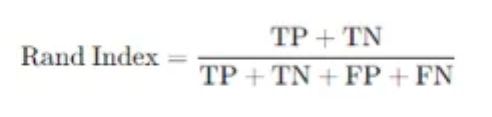

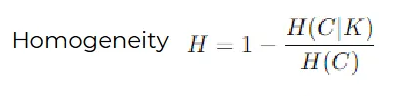

Rand Index: Mide la cantidad de aciertos sobre el total, debido al gran número de muestras y múltiples clases, la mayoría de los pares de puntos pertenecen a clases distintas. El Rand Index contabiliza estos pares como aciertos, lo que tiende a inflar el resultado incluso cuando el clustering no recupera la estructura real. Por ello, no es una métrica suficientemente discriminativa para este dataset.
<br>

Homogeneity: Como el dataset representa ubicaciones físicas con variabilidad interna de señal, es probable que una misma clase se distribuya en varias regiones del espacio de características. La métrica de homogeneidad no penaliza esta fragmentación, por lo que puede sobreestimar el desempeño del clustering en este contexto.

Se emplearon NMI y ARI ya que en este contexto, métricas que evalúan correspondencia estructural global son más apropiadas que aquellas basadas únicamente en coincidencias exactas. NMI mide cuánta información sobre la etiqueta real aporta el cluster asignado, mientras que ARI evalúa agrupamientos correctos por encima del azar, permitiendo valorar agrupaciones parcialmente correctas.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score

results = []

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_train_pca)

    sil = silhouette_score(X_train_pca, labels)
    ari = adjusted_rand_score(y_train, labels)
    nmi = normalized_mutual_info_score(y_train, labels)

    results.append((k, sil, ari, nmi))

results_df = pd.DataFrame(results, columns=["K", "Silhouette", "ARI", "NMI"])
results_df


,K,Silhouette,ARI,NMI
0,2,0.532376,0.002147,0.032419
1,3,0.092748,0.164831,0.420193
2,6,0.145272,0.245316,0.519630
3,10,0.119784,0.429036,0.623004
4,18,0.172165,0.300952,0.557970
5,20,0.170084,0.277957,0.555602


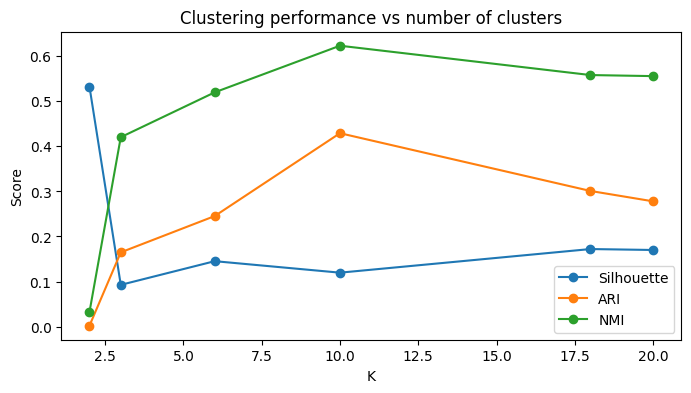

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(results_df["K"], results_df["Silhouette"], marker='o', label="Silhouette")
plt.plot(results_df["K"], results_df["ARI"], marker='o', label="ARI")
plt.plot(results_df["K"], results_df["NMI"], marker='o', label="NMI")

plt.xlabel("K")
plt.ylabel("Score")
plt.title("Clustering performance vs number of clusters")
plt.legend()
plt.show()


Mientras k=2 maximiza la separación geométrica (silhouette), no correpsonde a areas espaciales reales (bajo ARI), Los más altos scores en ARI y NMI se logran con un k = 10

### 4.2 Visualización con reducción de la dimensionalidad (t-SNE)

Como lo que nos interesa es la visualización, utilizaremos otro PCA para este fin e ignoraremos el PCA anterior hecho que redujo a 123 dimensiones y mantuvo la varianza de los datos del 95%

In [ ]:
from sklearn.decomposition import PCA

pca_vis = PCA(n_components=50, random_state=42)
X_vis = pca_vis.fit_transform(X_train_scaled)

print("Shape after PCA for t-SNE:", X_vis.shape)

Shape after PCA for t-SNE: (19937, 50)


El PCA se aplicó inicialmente a 50 dimensiones antes del t-SNE para eliminar el ruido y estabilizar las vecindades locales. Mientras que el PCA (95%) se utiliza para el clustering y preservar la estructura, el t-SNE requiere una variedad con menor ruido para la visualización, no para preservar la varianza máxima.

Aplicamos t-SNE

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate="auto",
    init="pca",
    random_state=42
)

X_tsne = tsne.fit_transform(X_vis)


Graficamos t-SNE

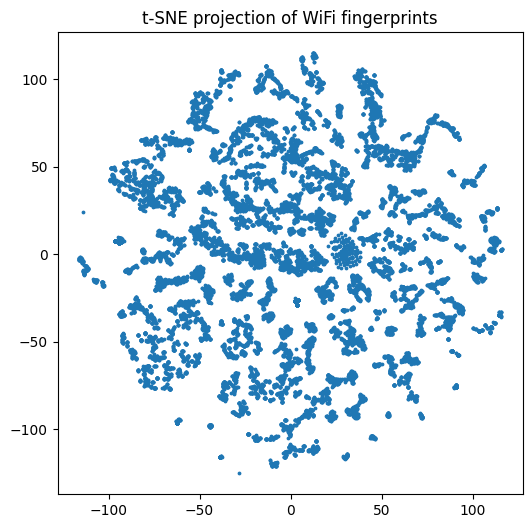

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], s=3)
plt.title("t-SNE projection of WiFi fingerprints")
plt.show()


In [ ]:
kmeans_final = KMeans(n_clusters=10, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_train_pca)


t-SNE con 10 Means

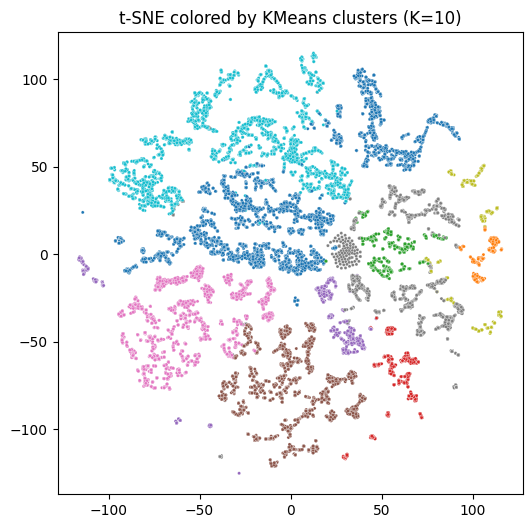

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=cluster_labels, palette="tab10", s=5, legend=False)
plt.title("t-SNE colored by KMeans clusters (K=10)")
plt.show()


t-SNE con áreas reales

recordemos que áreas = building + floor

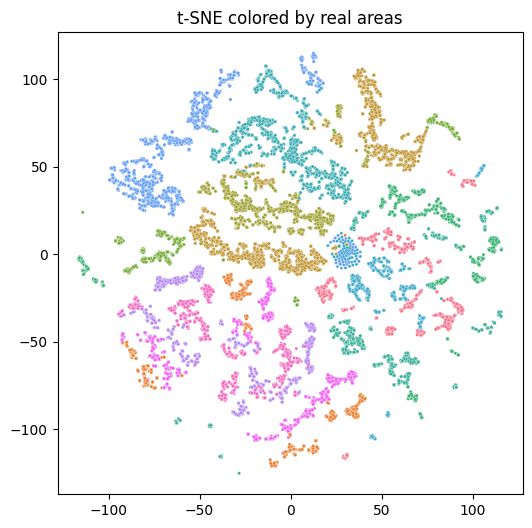

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y_train, s=5, legend=False)
plt.title("t-SNE colored by real areas")
plt.show()


La visualización revela que algunas áreas reales se dividen en varios subgrupos, mientras que otras áreas etiquetadas están fusionadas. Esto indica que las *WIFI Fingerprints reflejan la similitud de la señal en lugar de límites espaciales estrictos*.

### 4.3 Evaluación Interna y Externa

Evaluación Interna: Silhouette Score, Davis-Bouldin Index, Dunn Index <br>
Evaluación Externa: Rand Index, ARI, NMI,Homogeneity

como dunn index no está implementada la implementaremos nosotros

In [ ]:
from scipy.spatial.distance import cdist
import numpy as np

def dunn_index(X, labels):
    unique_clusters = np.unique(labels)
    unique_clusters = unique_clusters[unique_clusters != -1]

    clusters = [X[labels == k] for k in unique_clusters]

    # Distancia mínima entre clusters
    intercluster = np.inf
    for i in range(len(clusters)):
        for j in range(i+1, len(clusters)):
            dist = cdist(clusters[i], clusters[j])
            intercluster = min(intercluster, dist.min())

    # Diámetro máximo de clusters
    intracluster = 0
    for cluster in clusters:
        if len(cluster) > 1:
            dist = cdist(cluster, cluster)
            intracluster = max(intracluster, dist.max())

    return intercluster / intracluster


In [ ]:
from sklearn.metrics import rand_score, homogeneity_score
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

labels_final = cluster_labels  # K=10

sil = silhouette_score(X_train_pca, labels_final)
dbi = davies_bouldin_score(X_train_pca, labels_final)
dunn = dunn_index(X_train_pca, labels_final)
ri = rand_score(y_train, labels_final)
hom = homogeneity_score(y_train, labels_final)
ari = adjusted_rand_score(y_train, labels_final)
nmi = normalized_mutual_info_score(y_train, labels_final)


In [ ]:
import pandas as pd

results_final = pd.DataFrame({
    "Metric": ["Silhouette","Davies-Bouldin","Dunn",
               "Rand Index","ARI","NMI","Homogeneity"],
    "Value": [sil, dbi, dunn, ri, ari, nmi, hom]
})

results_final

,Metric,Value
0,Silhouette,0.119784
1,Davies-Bouldin,1.992226
2,Dunn,0.018869
3,Rand Index,0.873812
4,ARI,0.429036
5,NMI,0.623004
6,Homogeneity,0.557131


Las *métricas internas* indican que los clusters presentan alta superposición y baja separación, lo que sugiere que *los datos no forman grupos compactos en el espacio euclidiano*. Sin embargo, *las métricas externas (ARI y NMI) muestran una correspondencia moderada con las etiquetas reales*, *indicando que existe una estructura en los datos que KMeans logra capturar parcialmente*. Esto sugiere que la distribución de las clases no sigue la forma esférica asumida por KMeans, por lo que algoritmos basados en densidad o conectividad podrían modelar mejor la estructura o sea DBSCAN.

KMeans encontró la mejor aproximación esférica posible a una estructura no esférica.

Ahora para mejorar el resultado de KMeans, nos limitaremos a agrupar por edificios que están más separados físicamente, la señal WiFi cambia mucho y clustering debería funcionar mejor.

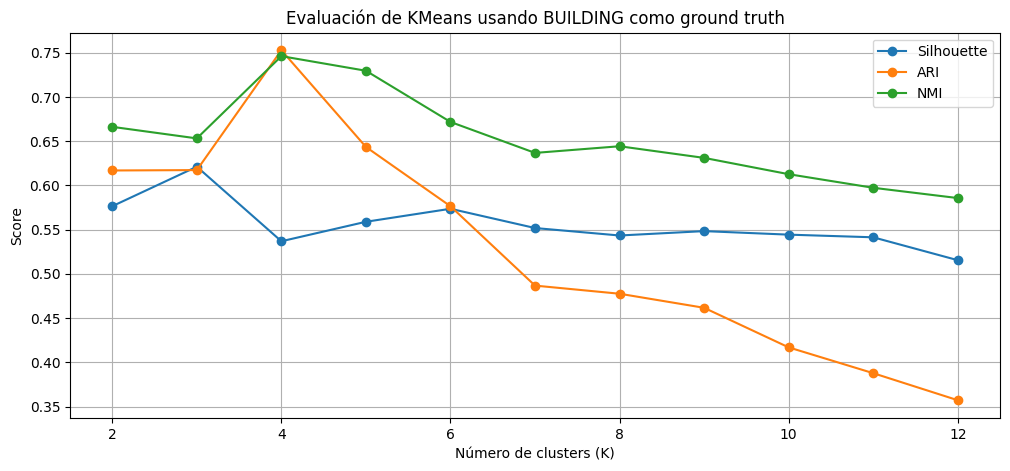

In [ ]:
y_building = train_df["BUILDINGID"].values

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
import pandas as pd

results_building = []

for k in range(2, 13):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = kmeans.fit_predict(X_pca_2d)

    sil = silhouette_score(X_pca_2d, labels)
    ari = adjusted_rand_score(y_building, labels)
    nmi = normalized_mutual_info_score(y_building, labels)

    results_building.append([k, sil, ari, nmi])

results_building = pd.DataFrame(results_building, columns=["K","Silhouette","ARI","NMI"])
results_building

import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.plot(results_building["K"], results_building["Silhouette"], marker='o', label="Silhouette")
plt.plot(results_building["K"], results_building["ARI"], marker='o', label="ARI")
plt.plot(results_building["K"], results_building["NMI"], marker='o', label="NMI")

plt.xlabel("Número de clusters (K)")
plt.ylabel("Score")
plt.title("Evaluación de KMeans usando BUILDING como ground truth")
plt.legend()
plt.grid(True)
plt.show()



K = 3: mejor score en silhouette <br>
K = 4: mejor score en NMI y ARI

**K=3 para edificios**

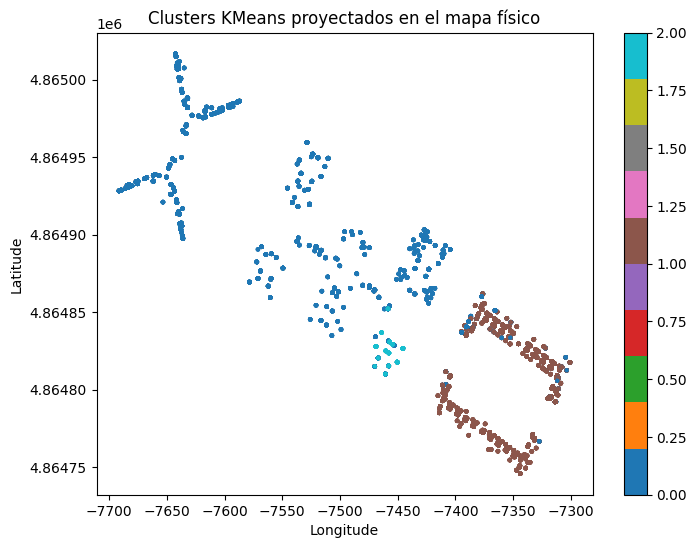

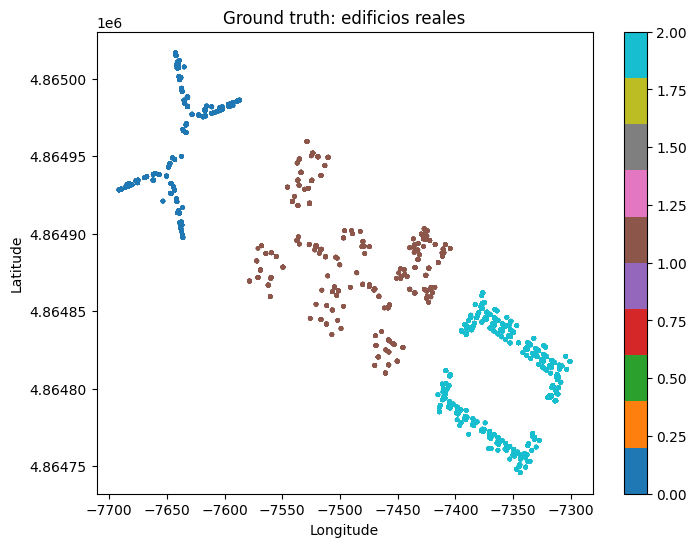

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=20)
clusters = kmeans.fit_predict(X_pca_2d)

train_df["cluster"] = clusters

plt.figure(figsize=(8,6))

scatter = plt.scatter(
    train_df["LONGITUDE"],
    train_df["LATITUDE"],
    c=train_df["cluster"],
    cmap="tab10",
    s=5
)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Clusters KMeans proyectados en el mapa físico")
plt.colorbar(scatter)
plt.show()

plt.figure(figsize=(8,6))

scatter = plt.scatter(
    train_df["LONGITUDE"],
    train_df["LATITUDE"],
    c=train_df["BUILDINGID"],
    cmap="tab10",
    s=5
)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Ground truth: edificios reales")
plt.colorbar(scatter)
plt.show()


**K=4 para edificios**

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=20)
clusters = kmeans.fit_predict(X_pca_2d)

train_df["cluster"] = clusters

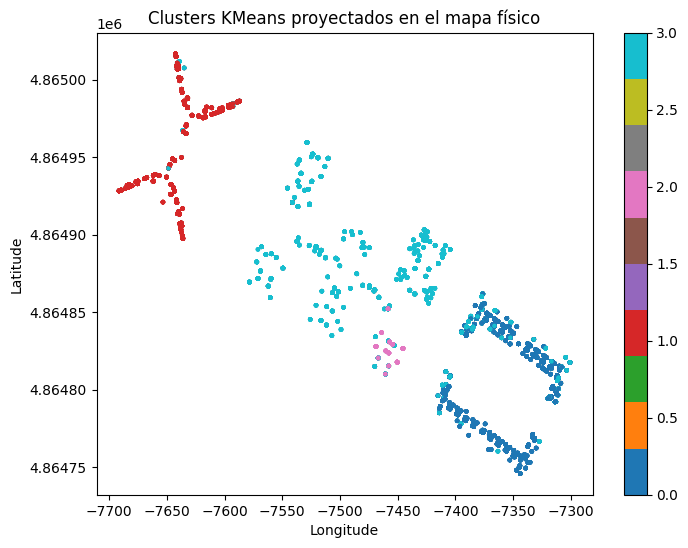

In [ ]:

plt.figure(figsize=(8,6))

scatter = plt.scatter(
    train_df["LONGITUDE"],
    train_df["LATITUDE"],
    c=train_df["cluster"],
    cmap="tab10",
    s=5
)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Clusters KMeans proyectados en el mapa físico")
plt.colorbar(scatter)
plt.show()


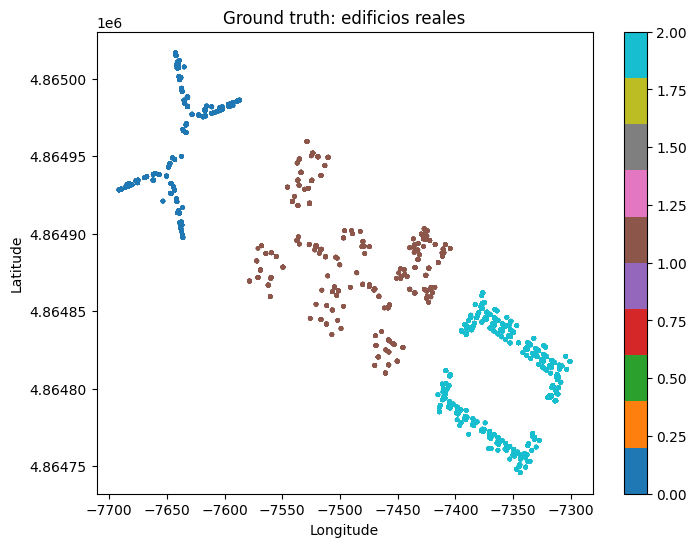

In [ ]:
plt.figure(figsize=(8,6))

scatter = plt.scatter(
    train_df["LONGITUDE"],
    train_df["LATITUDE"],
    c=train_df["BUILDINGID"],
    cmap="tab10",
    s=5
)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Ground truth: edificios reales")
plt.colorbar(scatter)
plt.show()


KMeans captura macro-estructura (edificios)
pero falla en micro-estructura (áreas)

## 5. DBSCAN

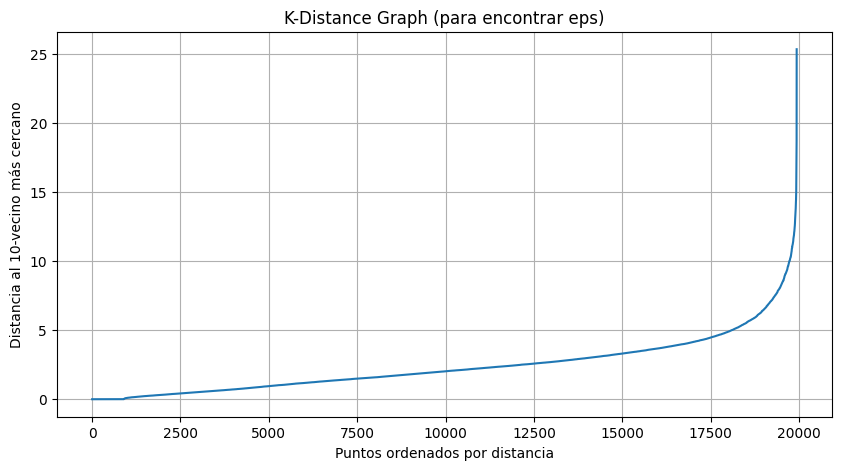


INTERPRETACIÓN DEL GRÁFICO:
Busca el punto de "máxima curvatura" (el codo) donde la gráfica se dispara hacia arriba.
El valor en el eje Y en ese punto es tu candidato ideal para 'eps'.
Probablemente esté entre 5 y 15 dado que son 123 dimensiones.

Iniciando búsqueda de hiperparámetros para DBSCAN...
   Eps  Clusters  Noise Points  Silhouette       ARI
0    8        49          1831   -0.021597  0.020762
1   10        27           894    0.072262  0.009029
2   12        15           489    0.091742  0.005208
3   15         3           164    0.306420  0.000655


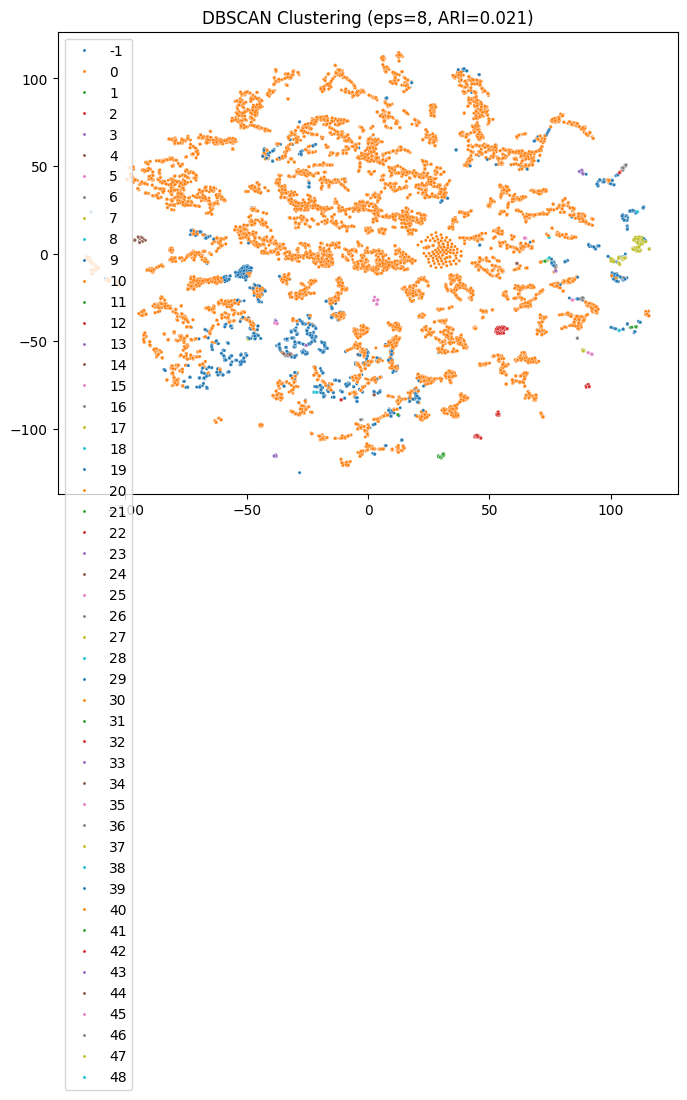

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# PASO 1: Determinar el 'eps' óptimo con el K-Distance Graph
# ---------------------------------------------------------
# La regla general es usar min_samples = 2 * dimensiones
# Tenemos ~123 dimensiones (PCA 95%), pero para densidad local
# seremos un poco más laxos. Probemos con un min_samples robusto.
min_samples_optimal = 10 # Un valor conservador para evitar micro-clusters

# Calculamos la distancia a los vecinos más cercanos
neighbors = NearestNeighbors(n_neighbors=min_samples_optimal)
neighbors_fit = neighbors.fit(X_train_pca)
distances, indices = neighbors_fit.kneighbors(X_train_pca)

# Ordenamos las distancias para ver el "codo"
distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.title("K-Distance Graph (para encontrar eps)")
plt.xlabel("Puntos ordenados por distancia")
plt.ylabel(f"Distancia al {min_samples_optimal}-vecino más cercano")
plt.grid(True)
plt.show()

print("""
INTERPRETACIÓN DEL GRÁFICO:
Busca el punto de "máxima curvatura" (el codo) donde la gráfica se dispara hacia arriba.
El valor en el eje Y en ese punto es tu candidato ideal para 'eps'.
Probablemente esté entre 5 y 15 dado que son 123 dimensiones.
""")

# ---------------------------------------------------------
# PASO 2: Grid Search "Manual" alrededor del codo
# ---------------------------------------------------------
# Basado en el gráfico, define un rango de eps para probar.
# Ejemplo: si el codo está en 8, prueba [6, 8, 10, 12]

eps_candidates = [8, 10, 12, 15] # AJUSTA ESTOS VALORES SEGÚN EL GRÁFICO ANTERIOR
best_ari = -1
best_model = None
results_dbscan = []

print("Iniciando búsqueda de hiperparámetros para DBSCAN...")

for eps in eps_candidates:
    db = DBSCAN(eps=eps, min_samples=min_samples_optimal, metric='euclidean')
    labels = db.fit_predict(X_train_pca)

    # Métricas
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    # Solo calculamos métricas si encontró al menos 2 clusters
    if n_clusters > 1:
        sil = silhouette_score(X_train_pca, labels)
        ari = adjusted_rand_score(y_train, labels)
        results_dbscan.append((eps, n_clusters, n_noise, sil, ari))

        if ari > best_ari:
            best_ari = ari
            best_model = labels
            best_eps = eps
    else:
        results_dbscan.append((eps, n_clusters, n_noise, -1, -1))

# Mostrar resultados
df_dbscan = pd.DataFrame(results_dbscan, columns=["Eps", "Clusters", "Noise Points", "Silhouette", "ARI"])
print(df_dbscan)

# ---------------------------------------------------------
# PASO 3: Visualización del Mejor Resultado
# ---------------------------------------------------------
if best_model is not None:
    plt.figure(figsize=(8, 6))
    # Usamos el t-SNE que ya calculaste antes (X_tsne) para visualizar
    sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=best_model, palette="tab10", s=5, legend="full")
    plt.title(f"DBSCAN Clustering (eps={best_eps}, ARI={best_ari:.3f})")
    plt.show()
else:
    print("DBSCAN no logró encontrar una estructura de clusters válida.")